In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras import models, layers, optimizers, datasets
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(trainX, trainY), (testX, testY) = datasets.mnist.load_data()

In [ ]:
trainX = trainX.reshape((trainX.shape[0], -1))
testX = testX.reshape((testX.shape[0], -1))
trainX, testX = trainX.astype("float32") / 255.0, testX.astype("float32") / 255.0

In [ ]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
model = models.Sequential([
    layers.Dense(256, input_shape=(trainX.shape[1],), activation="sigmoid"),  # Hidden layer with sigmoid
    layers.Dense(128, activation="sigmoid"),  # Additional hidden layer
    layers.Dense(10, activation="softmax")  # Output layer for 10 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
opt = optimizers.SGD(learning_rate=0.01)  # SGD Optimizer
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10, batch_size=32)  # Model training

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2782 - loss: 2.2311 - val_accuracy: 0.5960 - val_loss: 1.8850
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6569 - loss: 1.6818 - val_accuracy: 0.7692 - val_loss: 1.0888
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7786 - loss: 0.9904 - val_accuracy: 0.8248 - val_loss: 0.7366
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8289 - loss: 0.7000 - val_accuracy: 0.8498 - val_loss: 0.5743
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8545 - loss: 0.5613 - val_accuracy: 0.8705 - val_loss: 0.4839
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8705 - loss: 0.4850 - val_accuracy: 0.8839 - val_loss: 0.4317
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8791 - loss: 0.4430 - val_accuracy: 0.8920 - val_loss: 0.3969
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8895 - loss: 0.403

In [ ]:
test_loss, test_accuracy = model.evaluate(testX, testY)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8912 - loss: 0.3859


In [ ]:
print(classification_report(testY.argmax(axis=1), predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       980
           1       0.95      0.97      0.96      1135
           2       0.89      0.87      0.88      1032
           3       0.88      0.89      0.89      1010
           4       0.89      0.93      0.91       982
           5       0.87      0.82      0.85       892
           6       0.91      0.93      0.92       958
           7       0.93      0.90      0.91      1028
           8       0.87      0.84      0.86       974
           9       0.89      0.87      0.88      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



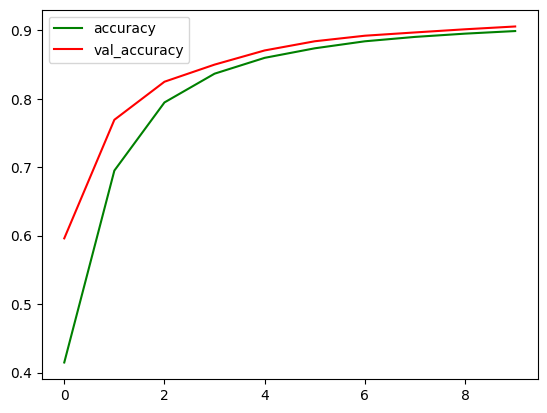

In [ ]:
plt.plot(history.history['accuracy'], label = 'accuracy', color = 'green')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy', color = 'red')
plt.legend()


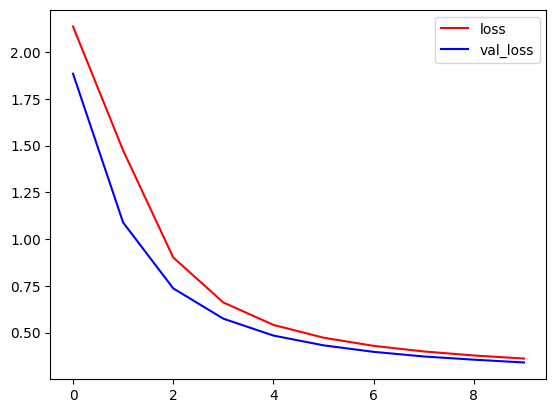

In [ ]:
plt.plot(history.history['loss'], label = 'loss', color = 'red')
plt.plot(history.history['val_loss'], label = 'val_loss', color = 'blue')
plt.legend()

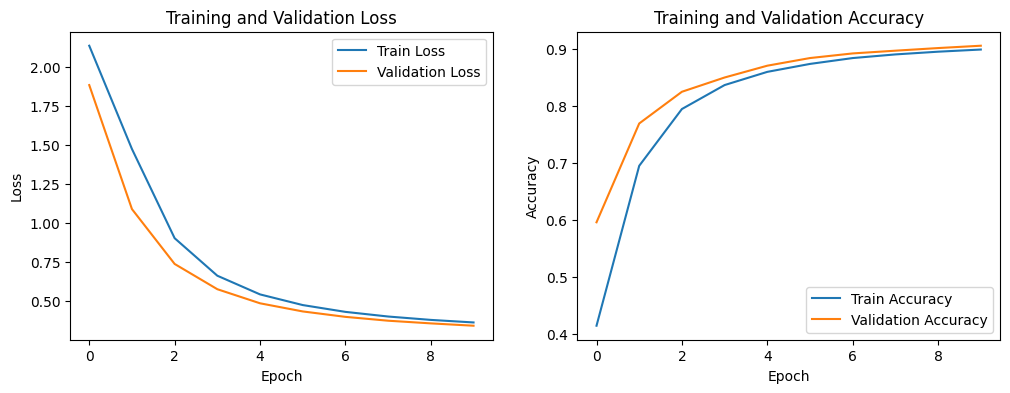

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()



plt.show()